## Importing necessary libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) #To display all the columns of a dataset (None indiactes that there is no
                                                        #limit on the no of the columns to be printed for the dataset)

# Reading the data 📃

In [138]:
df = pd.read_excel('Employee_Turnover_dataset_official_UFG.xlsx')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          3842 non-null   object        
 1   ID_Empregado                    3842 non-null   object        
 2   Genero                          3842 non-null   object        
 3   Data_de_Nascimento              3842 non-null   datetime64[ns]
 4   Data_de_Contratacao             3842 non-null   datetime64[ns]
 5   Data_de_saida                   381 non-null    datetime64[ns]
 6   Idade                           3842 non-null   float64       
 7   TempoCasa                       3842 non-null   float64       
 8   Codigo_do_Cargo                 3842 non-null   object        
 9   Modulo                          3842 non-null   object        
 10  WorkCategory                    3842 non-null   object        
 11  MO  

In [140]:
# Define a dictionary mapping the old column names to the new English names
column_mapping = {
    'Status': 'Status',
    'ID_Empregado': 'Employee_ID',
    'Genero': 'Gender',
    'Data_de_Nascimento': 'Date_of_Birth',
    'Data_de_Contratacao': 'Hire_Date',
    'Data_de_saida': 'Exit_Date',
    'Idade': 'Age',
    'TempoCasa': 'Tenure',
    'Codigo_do_Cargo': 'Job_Code',
    'Modulo': 'Module',
    'WorkCategory': 'Work_Category',
    'MO': 'MO',
    'Departamento': 'Department',
    'VP': 'VP',
    'Diretoria': 'Directorate',
    'Gerencia': 'Management',
    'Supervisao': 'Supervision',
    'LocationCode': 'Location_Code',
    'EstadoCivil': 'Marital_Status',
    'Data_de_Entrada_na_posicao': 'Date_of_Entry_Position',
    'Data_de_Entrada_no_Cargo_Atual': 'Date_of_Entry_Current_Position',
    'PNF': 'PNF',
    'Avaliacao_de_Desempenho': 'Performance_Evaluation',
    'Data_do_ultimo_aumento': 'Last_Increase_Date',
    'Motivo': 'Reason',
    'Column01': 'Column01',
    'Column02': 'Column02'
}

# Rename the columns using the mapping dictionary
df = df.rename(columns=column_mapping)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Status                          3842 non-null   object        
 1   Employee_ID                     3842 non-null   object        
 2   Gender                          3842 non-null   object        
 3   Date_of_Birth                   3842 non-null   datetime64[ns]
 4   Hire_Date                       3842 non-null   datetime64[ns]
 5   Exit_Date                       381 non-null    datetime64[ns]
 6   Age                             3842 non-null   float64       
 7   Tenure                          3842 non-null   float64       
 8   Job_Code                        3842 non-null   object        
 9   Module                          3842 non-null   object        
 10  Work_Category                   3842 non-null   object        
 11  MO  

# Data Preprocessing






######  ▶️ Department = VP/ Directorate/ Management

    Since Department is the combination of above features, We'll drop the Department column

In [142]:
df = df.drop(['Column01', 'Column02', 'Date_of_Birth','Employee_ID', 'Department', 'Tenure'], axis=1)

In [143]:
# Replace 'Nao teve aumento (there was no increase)' with '12-12-2090' in the 'Last_Increase_Date' column
df['Last_Increase_Date'] = df['Last_Increase_Date'].replace('Nao teve aumento', '12-12-2090')

In [144]:
## Converting all dates to month/year format

df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])  # Convert the column to datetime type
df['Hire_Date'] = df['Hire_Date'].dt.strftime("%m/%Y") # Convert Hire_Date to month/year format
df['Exit_Date'] = pd.to_datetime(df['Exit_Date'])
df['Exit_Date'] = df['Exit_Date'].dt.strftime("%m/%Y")
df['Date_of_Entry_Position'] = pd.to_datetime(df['Date_of_Entry_Position'])
df['Date_of_Entry_Position'] = df['Date_of_Entry_Position'].dt.strftime("%m/%Y")
df['Date_of_Entry_Current_Position'] = pd.to_datetime(df['Date_of_Entry_Current_Position'])
df['Date_of_Entry_Current_Position'] = df['Date_of_Entry_Current_Position'].dt.strftime("%m/%Y")
df['Last_Increase_Date'] = pd.to_datetime(df['Last_Increase_Date'])
df['Last_Increase_Date'] = df['Last_Increase_Date'].dt.strftime("%m/%Y")

In [145]:
# df['Tenure'] = df['Tenure'] / 12 #Converting tenure (which was by given in months) to years

In [146]:
unique_Statuses = df['Status'].unique()
print(unique_Statuses)
Status_mapping = {'Ativo': 0, 'Demitido': 1} # Ativo= Active, Demitido= Fired
df['Status'] = df['Status'].map(Status_mapping)
unique_Statuses = df['Status'].unique()
print(unique_Statuses)

['Ativo' 'Demitido']
[0 1]


#### Notation : 
    1: Denotes turnover 
    0: Still working in the company

In [147]:
unique_MOs = df['MO'].unique()
print(unique_MOs)
MO_mapping = {'Indireta': 0, 'Direta': 1} #Indireta= indirect, Direta= direct
df['MO'] = df['MO'].map(MO_mapping)
unique_MOs = df['MO'].unique()
print(unique_MOs)

['Indireta' 'Direta']
[0 1]


In [148]:
unique_genders = df['Gender'].unique()
print(unique_genders)
gender_mapping = {'Masculino': 0, 'Feminino': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
unique_genders = df['Gender'].unique()
print(unique_genders)

['Masculino' 'Feminino']
[0 1]


In [149]:
# Performance_Evaluation

translation_map = {
    'Sem pontuacao': 'No Score',
    'Outstanding': 'Outstanding',
    'Excellent': 'Excellent',
    'High Valued': 'Highly Valued',
    'Improvement Needed': 'Improvement Needed',
    'Inelegivel': 'Ineligible'
}

df['Performance_Evaluation'] = df['Performance_Evaluation'].map(translation_map)

unique_values = df['Performance_Evaluation'].unique()
print(unique_values)

['No Score' 'Outstanding' 'Excellent' 'Highly Valued' 'Improvement Needed'
 'Ineligible']


In [150]:
# Convert 'Age' column to int64
df['Age'] = df['Age'].astype(int)

# Convert 'Tenure' column to int64
# df['Tenure'] = df['Tenure'].astype(int)

# Checking duplicates


In [151]:
print(df.duplicated().value_counts())

df.drop_duplicates(inplace=True) #inplace=True argument ensures that the changes are made directly to the data DataFrame,
                                    #modifying it in-place rather than creating a new DataFrame.
    
print(len(df)) #returns the number of rows in the DataFrame.

False    3842
dtype: int64
3842


### No duplicates found!!

# Exploratory Data Analysis (EDA)

### Exit Date and Turnover


### Target Variable i.e. Status(Turnover)

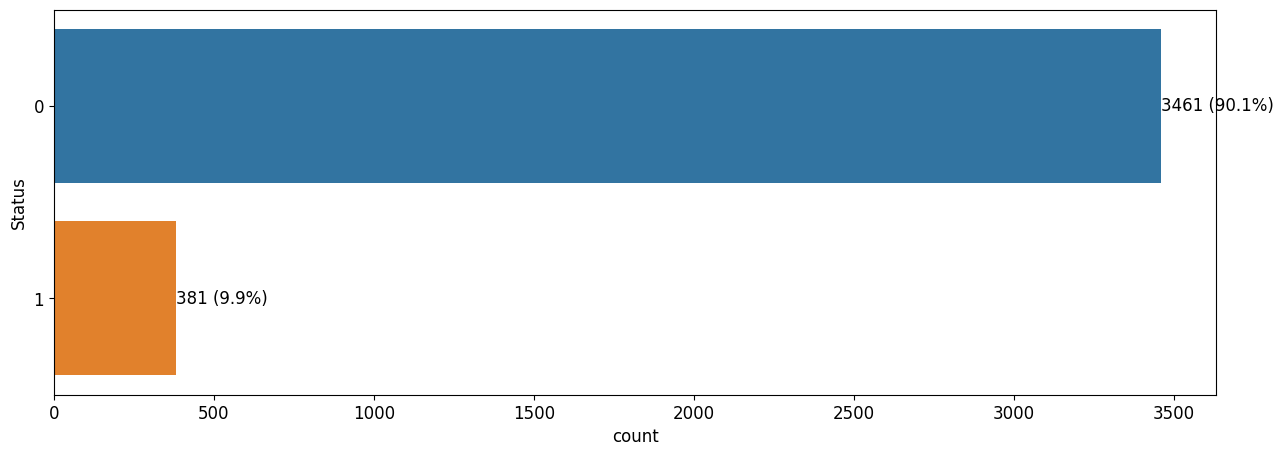

In [152]:
plt.figure(figsize=(15, 5))
plt.rc("font", size=12)

status_counts = df["Status"].value_counts()
total_count = status_counts.sum()

sns.countplot(y="Status", data=df, order=status_counts.index)
for i, (count, status) in enumerate(zip(status_counts, status_counts.index)):
    percentage = count / total_count * 100
    plt.text(count + 1, i, f"{count} ({percentage:.1f}%)", va='center')

plt.show()

## Observations

    Here data is imbalanced i.e. Turnover Yes is in small number as compared to Turnover No

## What problems do imbalanced dataset causes?

    imbalanced dataset creates imbalanced/biased learning

### Age and Performance Evaluation

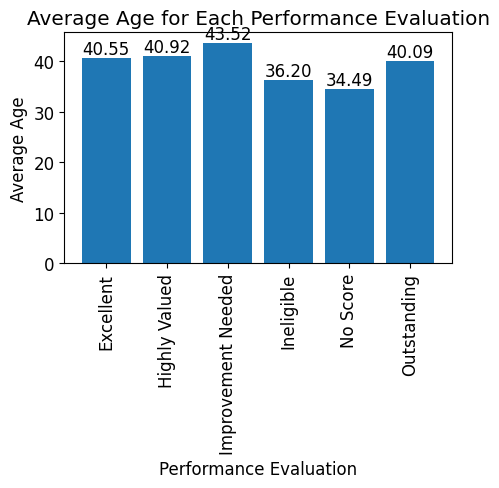

In [153]:
import matplotlib.pyplot as plt

# Calculate the average age for each performance evaluation value
average_ages = df.groupby('Performance_Evaluation')['Age'].mean()

# Create a bar plot to show the average age for each performance evaluation value
plt.figure(figsize=(5, 3))
plt.bar(average_ages.index, average_ages.values)
plt.xlabel('Performance Evaluation')
plt.ylabel('Average Age')
plt.title('Average Age for Each Performance Evaluation')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

# Add labels to the bars indicating the actual average age values
for i, v in enumerate(average_ages.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

## Performance_Evaluation and Turnover

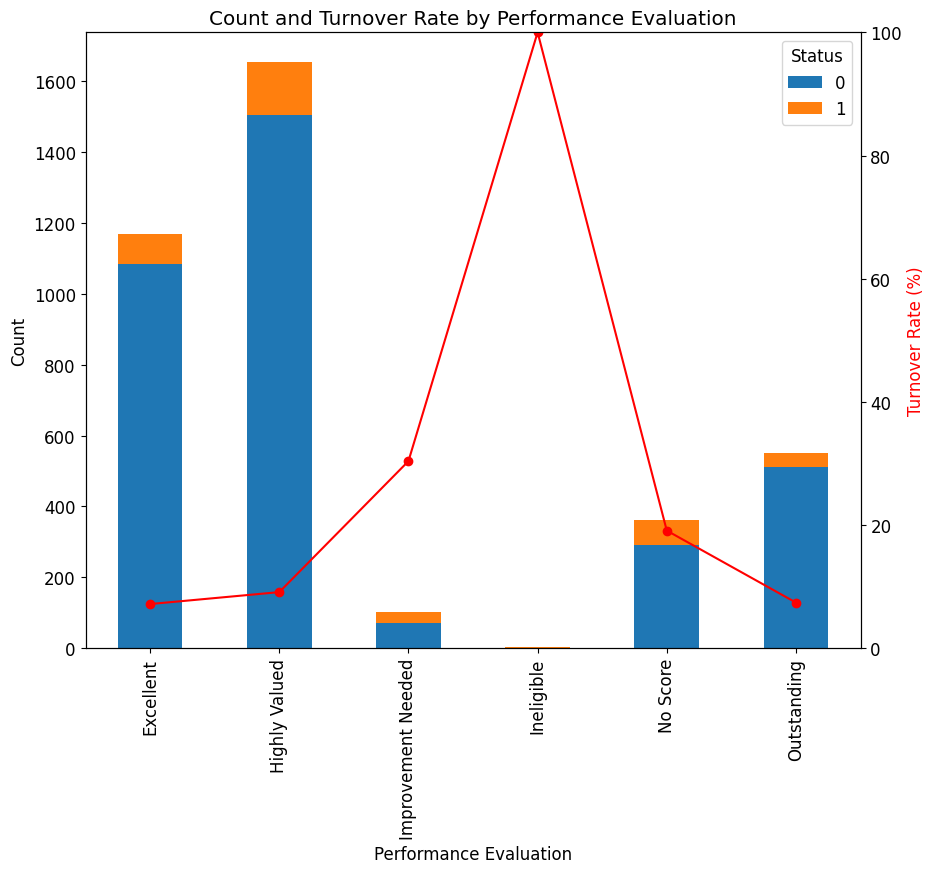

In [154]:
# Calculate the count of turnover status for each performance evaluation value
turnover_counts = df.groupby(['Performance_Evaluation', 'Status'])['Status'].count().unstack()

# Calculate the total count of turnover for each performance evaluation value
turnover_totals = turnover_counts.sum(axis=1)

# Calculate the turnover rate (percentage) for each performance evaluation value
turnover_rates = (turnover_counts[1] / turnover_totals) * 100

# Create a bar plot to show the count and turnover rate for each performance evaluation value
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1 = turnover_counts.plot(kind='bar', stacked=True, ax=ax1)
ax2 = ax1.twinx()
ax2.plot(turnover_rates.index, turnover_rates.values, color='r', marker='o')
ax2.set_ylabel('Turnover Rate (%)', color='r')

ax1.set_xlabel('Performance Evaluation')
ax1.set_ylabel('Count')
ax2.set_ylim(0, 100)
plt.title('Count and Turnover Rate by Performance Evaluation')
plt.xticks(rotation=45)

plt.show()

#  Gender

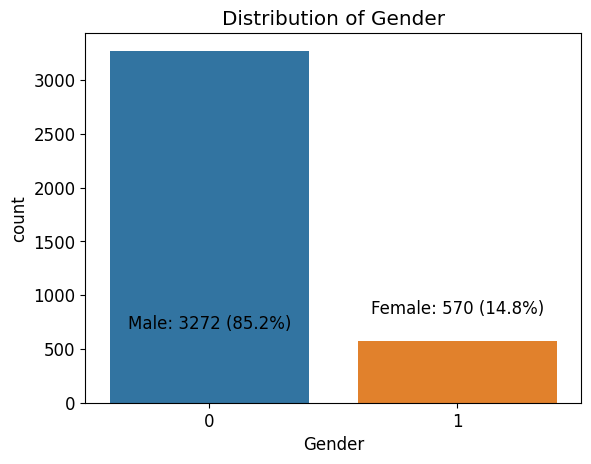

In [155]:
sns.countplot(data=df, x='Gender')

# Calculate the count and percentage of each gender
gender_counts = df['Gender'].value_counts()
total_count = gender_counts.sum()
male_count = gender_counts[0]
female_count = gender_counts[1]
male_percentage = male_count / total_count * 100
female_percentage = female_count / total_count * 100

# Annotate the bars with the counts and percentages
plt.annotate(f'Male: {male_count} ({male_percentage:.1f}%)', xy=(0, male_count), xytext=(0, -200),
             textcoords='offset points', ha='center', color='black')
plt.annotate(f'Female: {female_count} ({female_percentage:.1f}%)', xy=(1, female_count), xytext=(0, 20),
             textcoords='offset points', ha='center', color='black')

plt.title('Distribution of Gender')
plt.show()

#  Age

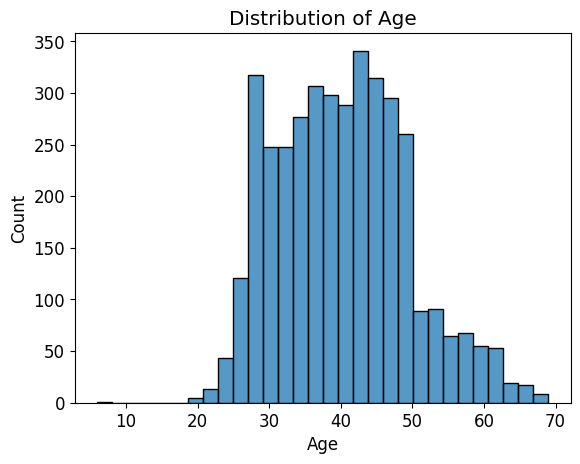

In [156]:
sns.histplot(data=df, x='Age', bins=30)
plt.title('Distribution of Age')
plt.show()

# Checking missing values

In [157]:
df.isnull().sum()

# Department = VP/ Directorate/ Management

Status                               0
Gender                               0
Hire_Date                            0
Exit_Date                         3461
Age                                  0
Job_Code                             0
Module                               0
Work_Category                        0
MO                                   0
VP                                   0
Directorate                       1070
Management                         171
Supervision                        387
Location_Code                        0
Marital_Status                       0
Date_of_Entry_Position               2
Date_of_Entry_Current_Position      14
PNF                                  0
Performance_Evaluation               0
Last_Increase_Date                   0
Reason                               0
dtype: int64

# Missing values :

    Features              No of Missing values

    1. Exit_Date                         3461

    2. Directorate                       1070

    3. Management                         171

    4. Supervision                        387

    5. Date_of_Entry_Position               2

    6. Date_of_Entry_Current_Position      14

In [158]:
# Fill missing values in the specified columns with zero [Since those people are not in 
                                                                #a department where they have a missing value]
df['Directorate'] = df['Directorate'].fillna(0)
df['Management'] = df['Management'].fillna(0)
df['Supervision'] = df['Supervision'].fillna(0)

In [159]:
df.isnull().sum()

Status                               0
Gender                               0
Hire_Date                            0
Exit_Date                         3461
Age                                  0
Job_Code                             0
Module                               0
Work_Category                        0
MO                                   0
VP                                   0
Directorate                          0
Management                           0
Supervision                          0
Location_Code                        0
Marital_Status                       0
Date_of_Entry_Position               2
Date_of_Entry_Current_Position      14
PNF                                  0
Performance_Evaluation               0
Last_Increase_Date                   0
Reason                               0
dtype: int64

In [160]:
# <!-- ### Not relevant!!
# Define the relevant subgroups for group-based imputation
# subgroups = ['Hire_Date','Job_Code', 'Module', 'Work_Category', 'MO', 'PNF','VP','PNF','Performance_Evaluation','Last_Increase_Date']


# Perform group-based imputation for Directorate
# df['Directorate'] = df.groupby(subgroups)['Directorate'].transform(lambda x: x.fillna(x.mode().iat[0] if not x.isnull().all() else ''))

# Perform group-based imputation for Management
# df['Management'] = df.groupby(subgroups)['Management'].transform(lambda x: x.fillna(x.mode().iat[0] if not x.isnull().all() else ''))

# Perform group-based imputation for Supervision
# df['Supervision'] = df.groupby(subgroups)['Supervision'].transform(lambda x: x.fillna(x.mode().iat[0] if not x.isnull().all() else '')) -->

In [161]:
# Fill missing values in 'Date_of_Entry_Position' with mode
df['Date_of_Entry_Position'].fillna(df['Date_of_Entry_Position'].mode().iat[0], inplace=True)

# Fill missing values in 'Date_of_Entry_Current_Position' with mode
df['Date_of_Entry_Current_Position'].fillna(df['Date_of_Entry_Current_Position'].mode().iat[0], inplace=True)

### Since for the employees who haven't yet left the company, there Exit date is NULL,therefore filling exit date with arbitrary far date such as 12-2090

In [162]:
df['Exit_Date'].fillna('12-2090', inplace=True)

In [163]:
df.isnull().sum()

Status                            0
Gender                            0
Hire_Date                         0
Exit_Date                         0
Age                               0
Job_Code                          0
Module                            0
Work_Category                     0
MO                                0
VP                                0
Directorate                       0
Management                        0
Supervision                       0
Location_Code                     0
Marital_Status                    0
Date_of_Entry_Position            0
Date_of_Entry_Current_Position    0
PNF                               0
Performance_Evaluation            0
Last_Increase_Date                0
Reason                            0
dtype: int64

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Status                          3842 non-null   int64 
 1   Gender                          3842 non-null   int64 
 2   Hire_Date                       3842 non-null   object
 3   Exit_Date                       3842 non-null   object
 4   Age                             3842 non-null   int32 
 5   Job_Code                        3842 non-null   object
 6   Module                          3842 non-null   object
 7   Work_Category                   3842 non-null   object
 8   MO                              3842 non-null   int64 
 9   VP                              3842 non-null   object
 10  Directorate                     3842 non-null   object
 11  Management                      3842 non-null   object
 12  Supervision                     3842 non-null   

In [165]:
df = df.drop('PNF', axis=1) #Since we already have another metric for performance, that is: Performance_Evaluation

# Kruskal-Wallis Test 

    Significance of p-value obtained from Kruskal-Wallis Test
    =>it tells us whether there is a statistically significant difference in the distribution of a numerical variable across different categories of a categorical variable
    
    ***A small p-value (typically less than the chosen significance level, often 0.05) indicates strong evidence against the null hypothesis (no difference) and suggests that there is a statistically significant difference in the distributions.

In [ ]:
from scipy.stats import kruskal


# Step 1: Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'int32']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame to store the results
kruskal_results = pd.DataFrame(columns=numerical_columns, index=categorical_columns)

# Step 2: Perform the Kruskal-Wallis test for each numerical column grouped by each categorical column
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        grouped_data = df.groupby(cat_col)[num_col].apply(list)
        result = kruskal(*grouped_data)
        kruskal_results.at[cat_col, num_col] = result.pvalue

# Convert the p-values to numeric data type
kruskal_results = kruskal_results.astype(float)

# Display the correlation matrix between features (p-values)
print("Kruskal-Wallis Test Results (Correlation Matrix):")
print(kruskal_results)

In [166]:
df = df.drop('Date_of_Entry_Position', axis=1) #Since Date_of_Entry_Position is ambiguous as Hire_Date is already present!

In [167]:
df = df.drop('Hire_Date', axis=1)
df = df.drop('Exit_Date', axis=1)
df = df.drop('Date_of_Entry_Current_Position', axis=1)
df = df.drop('Last_Increase_Date', axis=1)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Status                  3842 non-null   int64 
 1   Gender                  3842 non-null   int64 
 2   Age                     3842 non-null   int32 
 3   Job_Code                3842 non-null   object
 4   Module                  3842 non-null   object
 5   Work_Category           3842 non-null   object
 6   MO                      3842 non-null   int64 
 7   VP                      3842 non-null   object
 8   Directorate             3842 non-null   object
 9   Management              3842 non-null   object
 10  Supervision             3842 non-null   object
 11  Location_Code           3842 non-null   object
 12  Marital_Status          3842 non-null   object
 13  Performance_Evaluation  3842 non-null   object
 14  Reason                  3842 non-null   object
dtypes: i

# Categorical to Numerical Encoding

In [169]:
# Get the columns with object data type into a list
object_columns = list(df.select_dtypes(include='object').columns)

# Print the list of object columns
print(object_columns)

['Job_Code', 'Module', 'Work_Category', 'VP', 'Directorate', 'Management', 'Supervision', 'Location_Code', 'Marital_Status', 'Performance_Evaluation', 'Reason']


In [170]:
# One Hot Encoding:

df_encoded = pd.get_dummies(df, columns=object_columns)

In [171]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Columns: 561 entries, Status to Reason_TRPROMSITESAL - Transferência site com Promocao
dtypes: int32(1), int64(3), uint8(557)
memory usage: 2.2 MB


In [172]:
df_encoded.head()

,Status,Gender,Age,MO,Job_Code_010L1B000106,Job_Code_010L1B000206,Job_Code_010L2B000401,Job_Code_010L2B002703,Job_Code_010L3A005501,Job_Code_010L3A005601,Job_Code_010L3A005701,Job_Code_010L3B008101,Job_Code_010L4B000801,Job_Code_010L4B003301,Job_Code_01101B0201BS,Job_Code_01101B0204BS,Job_Code_01103C1001BS,Job_Code_01103C1003BS,Job_Code_01103C1004EX,Job_Code_01103C1104EX,Job_Code_01103C1201BS,Job_Code_01103C1202BS,Job_Code_01103C1203BS,Job_Code_01103C1204EX,Job_Code_01104C0403BS,Job_Code_01106E0201BS,Job_Code_01106E0302BS,Job_Code_01106E0501BS,Job_Code_01106E0502BS,Job_Code_01106E0504EX,Job_Code_01106E0602BS,Job_Code_01201A0101BS,Job_Code_01201A0302BS,Job_Code_01202B0102BS,Job_Code_01202D0701BS,Job_Code_01202D0702BS,Job_Code_01202D0703BS,Job_Code_01202D0902BS,Job_Code_01203E0201BS,Job_Code_01203E0204BS,Job_Code_01203E0503BS,Job_Code_01203E0701BS,Job_Code_01203E0702BS,Job_Code_01203E0703BS,Job_Code_01203E0801BS,Job_Code_01203E0802BS,Job_Code_01302J0202BS,Job_Code_01302J0203BS,Job_Code_01302J0204BS,Job_Code_01302J0301BS,Job_Code_01302J0302BS,Job_Code_01302J0303BS,Job_Code_01302J0304BS,Job_Code_01302J0305CY,Job_Code_01302J0306CY,Job_Code_01303J0201BS,Job_Code_01303J0202BS,Job_Code_01303J0203BS,Job_Code_01303J0203MN,Job_Code_01303J0204BS,Job_Code_01303J0204MN,Job_Code_01303J0205CY,Job_Code_01303J0701BS,Job_Code_01303J0702BS,Job_Code_01303J0703BS,Job_Code_01303J0704BS,Job_Code_01401K0601BS,Job_Code_01401K0602BS,Job_Code_01402K1001BS,Job_Code_01402K1003BS,Job_Code_01402K1004BS,Job_Code_01402K1703BS,Job_Code_01402K1704BS,Job_Code_01402K2101BS,Job_Code_01402K3701BS,Job_Code_01402K3904BS,Job_Code_01403H0402BS,Job_Code_01403H0404BS,Job_Code_01403H0901BS,Job_Code_01403H0902BS,Job_Code_01403H0903BS,Job_Code_01403H0904BS,Job_Code_01403H0906CY,Job_Code_01403H1004BS,Job_Code_01403H1603BS,Job_Code_01403H1604BS,Job_Code_01403H1605CY,Job_Code_01403H2202BS,Job_Code_01403H2203BS,Job_Code_01403H2204BS,Job_Code_01403H2205CY,Job_Code_01403H2301CY,Job_Code_01403H2302CY,Job_Code_01403I0601BS,Job_Code_01403I0602BS,Job_Code_01403I0603BS,Job_Code_01403I0604BS,Job_Code_01403I0605CY,Job_Code_01403I0606CY,Job_Code_01403I1501BS,Job_Code_01403I1502BS,Job_Code_01502I1002BS,Job_Code_01502I1003BS,Job_Code_01502I1004BS,Job_Code_01502I1201BS,Job_Code_01502I1202BS,Job_Code_01502I1203BS,Job_Code_01502I1204BS,Job_Code_01503J0101BS,Job_Code_01503J0102BS,Job_Code_01503J0103BS,Job_Code_01503J0104BS,Job_Code_01503J0105CY,Job_Code_01503J0106CY,Job_Code_01503J0501BS,Job_Code_01503J0502BS,Job_Code_01503J0503BS,Job_Code_01503J0504BS,Job_Code_01503J0505CY,Job_Code_01503J0506CY,Job_Code_01503J0507CY,Job_Code_0161600101BS,Job_Code_0161720201BS,Job_Code_01808N0203BS,Job_Code_01808N0204BS,Job_Code_050L3A000201,Job_Code_050L4B000101,Job_Code_05202A0101BS,Job_Code_05202A0102BS,Job_Code_05301A0101BS,Job_Code_05301A0102BS,Job_Code_05401A0202BS,Job_Code_05401A0402BS,Job_Code_05401A0503BS,Job_Code_05501A0101BS,Job_Code_05501A0102BS,Job_Code_05501A0103BS,Job_Code_05501A0104BS,Job_Code_05501A0105CY,Job_Code_05501A0202BS,Job_Code_05501A0203BS,Job_Code_070L4B001401,Job_Code_07302E1103BS,Job_Code_07302E1104BS,Job_Code_07503J0202BS,Job_Code_07503J0204BS,Job_Code_090L3A001201,Job_Code_090L4B000103,Job_Code_090L4B000201,Job_Code_09101C0401BS,Job_Code_09101C0402BS,Job_Code_09101C0403BS,Job_Code_09101C0404BS,Job_Code_09101C0501BS,Job_Code_09101C0502BS,Job_Code_09101C0503BS,Job_Code_09103C0202BS,Job_Code_09103C0501BS,Job_Code_09103C0701BS,Job_Code_09104D0101BS,Job_Code_09104D0102BS,Job_Code_09104D0103BS,Job_Code_09104D0104EX,Job_Code_09104D0201BS,Job_Code_09104D0202BS,Job_Code_09104D0203BS,Job_Code_09104D0204EX,Job_Code_09104D0304EX,Job_Code_09104D0402BS,Job_Code_09202B0101BS,Job_Code_09202B0102BS,Job_Code_09202B0701BS,Job_Code_09202B0702BS,Job_Code_09202B1103BS,Job_Code_09203D0302BS,Job_Code_09203E0101BS,Job_Code_09203E0102BS,Job_Code_09203E0401BS,Job_Code_09203E0402BS,Job_Code_09203E0501BS,Job_Code_09203E0502BS,Job_Code_09203E0703BS,Job_Code_09303E0101BS,Job_Code_09303E0102BS,Job_Code_09303E010

# Scaling
 
    The goal of scaling is to bring different features onto a similar scale to avoid certain features dominating the analysis or model training process due to their larger magnitudes.

In [173]:
from sklearn.preprocessing import StandardScaler


continous_numerical_columns = ['Age']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = df_encoded.copy()
df_scaled[continous_numerical_columns] = scaler.fit_transform(df_scaled[continous_numerical_columns])

In [174]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Columns: 561 entries, Status to Reason_TRPROMSITESAL - Transferência site com Promocao
dtypes: float64(1), int64(3), uint8(557)
memory usage: 2.2 MB


# Terms🚩🚩🚩
    df_encoded = Encoded dataset
    df_scaled = Encoded + Scaled
    df = Not encoded, not scaled

# Pair Plot

In [ ]:
sns.pairplot(df, hue = 'Status')

      Since there is overlap between the target variable (0,1), therefore Logistic Regression is not recommended. 
      We would test KNN and later on Tree based classifiers!

# Correlation between features

### Correlation Matrix:

        Values from -1 to 1
        
        
    Positive Correlation: both increases or both decreases
    Negative Correlation: one increases other decrease, vice-versa
    No Correlation: no relationship exists

In [ ]:
# # Compute correlation matrix
# correlation_matrix = df_scaled.corr()

# # Set up the figure and axes
# fig, ax = plt.subplots(figsize=(10, 8))

# # Generate a colormap with different colors for positive and negative correlations
# cmap = sns.diverging_palette(220, 20, as_cmap=True)

# # Create the heatmap
# sns.heatmap(correlation_matrix, cmap=cmap, center=0, annot=True, fmt=".2f")

# # Set plot title
# plt.title("Correlation Matrix")

# # Show the plot
# plt.show()

# Insights from correlation matrix

    1. Status and Gender: There is a very weak positive correlation (0.020762) between employee status and gender. This suggests that gender has minimal influence on employee turnover. Gender alone is unlikely to be a significant factor in determining employee status.
    
    2. Status and Age: There is a weak negative correlation (-0.120523) between employee status and age. This implies that younger employees may be slightly more likely to have a different status (e.g., active, inactive) compared to older employees. However, the correlation coefficient indicates a weak relationship, so other factors likely contribute more significantly to employee status.

# Feature Selection ✨✨

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Status                  3842 non-null   int64 
 1   Gender                  3842 non-null   int64 
 2   Age                     3842 non-null   int32 
 3   Job_Code                3842 non-null   object
 4   Module                  3842 non-null   object
 5   Work_Category           3842 non-null   object
 6   MO                      3842 non-null   int64 
 7   VP                      3842 non-null   object
 8   Directorate             3842 non-null   object
 9   Management              3842 non-null   object
 10  Supervision             3842 non-null   object
 11  Location_Code           3842 non-null   object
 12  Marital_Status          3842 non-null   object
 13  Performance_Evaluation  3842 non-null   object
 14  Reason                  3842 non-null   object
dtypes: i

In [ ]:
# Create empty lists for object and int features
object_features = []
int_features = []

# Iterate over the columns of the DataFrame
for column in df.columns:
    # Exclude the "Status" column from the count
    if column == "Status":
        continue
    
    # Check the data type of the column
    if df[column].dtype == 'object':
        object_features.append(column)
    elif df[column].dtype == 'int64' or df[column].dtype == 'int32':
        int_features.append(column)

# Store the count of elements in each list
object_count = len(object_features)
int_count = len(int_features)

# Print the lists of features and their counts
print("List of features with object data type:")
print(object_features)
print(f"Count: {object_count}\n")
print("List of features with int data type:")
print(int_features)
print(f"Count: {int_count}\n")

## Chi squared test [Categorical Input vs Categorical Output]

    If the p-value is below the significance level, typically 0.05, it is common to reject the null hypothesis. This implies that there is a statistically significant association between the categorical variables in the population. On the other hand, if the p-value is above the significance level, we fail to reject the null hypothesis, suggesting that there is insufficient evidence to conclude a significant association.

In [176]:
import scipy.stats as stats

# Create an empty list for object features and p-values
object_features = []
p_values = []

# Iterate over the columns of the DataFrame to find categorical object features
for column in df.columns:
    if df[column].dtype == 'object' and column != 'Status':
        object_features.append(column)
        observed = pd.crosstab(df[column], df['Status'])
        chi2, p_value = stats.chisquare(observed.values.T)
        p_values.append(p_value[0])  # Retrieve the p-value from the list

# Create a DataFrame with feature names and p-values
result_df = pd.DataFrame({'Feature': object_features, 'p-value': p_values})

# Display the table
print(result_df)

                   Feature        p-value
0                 Job_Code   3.173105e-01
1                   Module   2.908754e-69
2            Work_Category   9.380298e-13
3                       VP  3.382460e-101
4              Directorate  2.223129e-167
5               Management   5.556433e-18
6              Supervision   1.451128e-42
7            Location_Code   3.071439e-19
8           Marital_Status   0.000000e+00
9   Performance_Evaluation  3.322171e-188
10                  Reason   2.699796e-03


# ANOVA [Numerical inputs vs Categorical Output]

In [177]:
import scipy.stats as stats

# Create an empty list for numerical features
numerical_features = []

# Iterate over the columns of the DataFrame to find numerical features
for column in df.columns:
    if df[column].dtype != 'object' and column != 'Status':
        numerical_features.append(column)

# Perform ANOVA test for each numerical feature against the 'Status' column
for feature in numerical_features:
    status_groups = []
    for status in df['Status'].unique():
        status_groups.append(df[df['Status'] == status][feature])
    f_value, p_value = stats.f_oneway(*status_groups)
    
    # Print the result
    print(f"Feature: {feature}")
    print(f"F-value: {f_value}")
    print(f"p-value: {p_value}")
    print("\n")

Feature: Gender
F-value: 1.656046570188769
p-value: 0.19821552291148353


Feature: Age
F-value: 56.60150008296927
p-value: 6.609398589523149e-14


Feature: MO
F-value: 11.3910229598116
p-value: 0.0007453223948059028




#### dropping Gender since p value>0.05

In [178]:
df = df.drop('Gender', axis=1)
df_encoded = df_encoded.drop('Gender', axis=1)
df_scaled = df_scaled.drop('Gender', axis=1)

In [179]:
# Making copies of df, df_encoded, and df_scaled:


df_copy = df.copy()

df_encoded_copy = df_encoded.copy()

df_scaled_copy = df_scaled.copy()

# Resampling

# Oversampling:
    Synthetic Minority Oversampling Technique (SMOTE): Generate synthetic samples for the minority class by interpolating new instances between existing minority class samples.
    
 ### Oversampling of scaled dataset

In [180]:
from imblearn.over_sampling import SMOTE

# Separate the features (X) and target variable (y)
X = df_scaled_copy.drop('Status', axis=1) 
y = df_scaled_copy['Status']

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_scaled_copy_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_scaled_copy_resampled['Status'] = y_resampled

# Check the class distribution after applying SMOTE
print(df_scaled_copy_resampled['Status'].value_counts())

0    3461
1    3461
Name: Status, dtype: int64


# Terminology 🛑🛑🛑

    df = Actual Data frame with columns dropped
    df_encoded = Encoded
    df_scaled = scaled without resampling

In [181]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842 entries, 0 to 3841
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Status                  3842 non-null   int64 
 1   Age                     3842 non-null   int32 
 2   Job_Code                3842 non-null   object
 3   Module                  3842 non-null   object
 4   Work_Category           3842 non-null   object
 5   MO                      3842 non-null   int64 
 6   VP                      3842 non-null   object
 7   Directorate             3842 non-null   object
 8   Management              3842 non-null   object
 9   Supervision             3842 non-null   object
 10  Location_Code           3842 non-null   object
 11  Marital_Status          3842 non-null   object
 12  Performance_Evaluation  3842 non-null   object
 13  Reason                  3842 non-null   object
dtypes: int32(1), int64(2), object(11)
memory usage: 435.2+ K

In [182]:
df_scaled_copy_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6922 entries, 0 to 6921
Columns: 560 entries, Age to Status
dtypes: float64(1), int64(2), uint8(557)
memory usage: 3.8 MB


# Splitting data for training and testing

In [183]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df_scaled_copy_resampled.drop('Status', axis=1) 
y = df_scaled_copy_resampled['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
print("Training set - X_train shape:", X_train.shape)
print("Training set - y_train shape:", y_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Testing set - y_test shape:", y_test.shape)

Training set - X_train shape: (5537, 559)
Training set - y_train shape: (5537,)
Testing set - X_test shape: (1385, 559)
Testing set - y_test shape: (1385,)


# Feature Ranking using Gini Impurity

In [ ]:
from sklearn.ensemble import RandomForestClassifier



# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features based on importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the ranked feature importance
print(feature_importance_df)

# RFECV (Recursive Feature Elimination) with Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFECV
# from sklearn.metrics import accuracy_score

# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Initialize the RFECV object with the Random Forest classifier and cross-validation strategy
# rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')

# # Fit RFECV to the training data to perform recursive feature elimination
# rfecv.fit(X_train, y_train)

# # Get the optimal number of features selected by RFECV
# optimal_num_features = rfecv.n_features_

# # Get the feature ranking, where higher values indicate higher importance
# feature_ranking = rfecv.ranking_

# # Get the selected features as a boolean mask
# selected_features_mask = rfecv.support_

# # Print the results
# print("Optimal number of features selected:", optimal_num_features)
# print("Feature Ranking:")
# print(pd.DataFrame({'Feature': X.columns, 'Ranking': feature_ranking}))
# print("Selected Features:")
# print(X.columns[selected_features_mask])

# # Optionally, evaluate the performance of the model with the selected features on the test set
# X_train_selected = X_train.iloc[:, selected_features_mask]
# X_test_selected = X_test.iloc[:, selected_features_mask]

# rf_classifier.fit(X_train_selected, y_train)
# y_pred = rf_classifier.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy with selected features:", accuracy)

# Training and Testing

### StepWise Logistic Regression

In [185]:
import statsmodels.api as sm



# Initialize an empty list to store the selected features
selected_features = []

#  Perform forward stepwise logistic regression
while len(selected_features) < X_train.shape[1]:
    remaining_features = list(set(X_train.columns) - set(selected_features))
    best_pvalue = 1  # Initialize with a high value
    best_feature = None
    
    for feature in remaining_features:
        model = sm.Logit(y_train, sm.add_constant(X_train[selected_features + [feature]])).fit(disp=False)
        pvalue = model.pvalues[feature]
        if pvalue < best_pvalue:
            best_pvalue = pvalue
            best_feature = feature
            
    if best_feature is not None:
        selected_features.append(best_feature)
    else:
        break

# Fit the final model using the selected features
final_model = sm.Logit(y_train, sm.add_constant(X_train[selected_features])).fit()

# Print the summary of the final model
print(final_model.summary())

LinAlgError: Singular matrix

# L1 (Lasso) regularization with logistic regression


    L1 regularization addresses the issue of overfitting by adding a penalty term to the logistic regression cost function.

In [186]:
from sklearn.linear_model import LogisticRegression


# Initialize the logistic regression model with L1 regularization (Lasso)
logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Print the coefficients and their corresponding features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
pd.set_option('display.max_rows', None)
print(coefficients)

                                               Feature  Coefficient
507                                    Supervision_SWF     2.954942
331                                    Supervision_5.0     2.581883
328                                    Supervision_2.0     2.116560
408                                    Supervision_PCO     1.466243
323                                     Management_GYP     1.465467
307                                     Management_GSD     1.310759
468                                    Supervision_SKY     1.161949
540               Reason_JOBCH_002-Alteracao de Modulo     1.147781
324                                     Management_GYT     1.084251
250                                    Directorate_DKC     0.603418
522                                 Location_Code_G170     0.571628
213                              Job_Code_09503J0401BS     0.510696
107                              Job_Code_01503J0102BS     0.414814
330                                    Supervisi

#### Cofficient Interpretation

    Positive Coefficients=>Features with positive coefficients are considered as positively associated with the target.
    Negative Coefficients=>As the predictor variable increases, the likelihood of Employee Turnover decreases. 
    
       Magnitude of the coefficients: 
       -----------x-----------------.
       
       Zero value : When a coefficient is exactly 0, it means that the corresponding feature has no impact on the predicted probability of the target class.
       
       Larger coefficient values imply a stronger association with the target variable. Logistic regression coefficients can be used to understand the relative importance of different features in predicting the target and can be helpful in feature selection or understanding the direction of relationships between predictors and outcomes.

## Removing features with zero-value coefficients

In [187]:
# Remove features with coefficient = 0
selected_features = coefficients[coefficients['Coefficient'] != 0]['Feature'].tolist()

# Filter the training data to keep only the selected features
X_train_selected = X_train[selected_features]

# Filter the test data to keep only the selected features
X_test_selected = X_test[selected_features]

# Fit the final model using the selected features
final_model = logreg.fit(X_train_selected, y_train)

# Get the coefficients of the final model
final_coefficients = pd.DataFrame({'Feature': X_train_selected.columns, 'Coefficient': final_model.coef_[0]})

# Print the count of features in the final model
print("Number of features in the final model:", len(final_coefficients))

# Print the coefficients
print(final_coefficients)

Number of features in the final model: 167
                                               Feature  Coefficient
0                                      Supervision_SWF     2.955547
1                                      Supervision_5.0     2.582742
2                                      Supervision_2.0     2.117084
3                                      Supervision_PCO     1.465296
4                                       Management_GYP     1.466561
5                                       Management_GSD     1.310072
6                                      Supervision_SKY     1.162308
7                 Reason_JOBCH_002-Alteracao de Modulo     1.146321
8                                       Management_GYT     1.085885
9                                      Directorate_DKC     0.600549
10                                  Location_Code_G170     0.571498
11                               Job_Code_09503J0401BS     0.511563
12                               Job_Code_01503J0102BS     0.415483
13   

# Now training other models with X_train_selected and y_train

## Random Forest Classifier

   ### Feature Ranking using RF

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data with selected features
rf_classifier.fit(X_train_selected, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': feature_importances})

# Sort the features based on importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked feature importance
print(feature_importance_df)

                                               Feature  Importance
161                              Reason_SALCH_01-Merit    0.214628
44                                                 Age    0.107574
67                             Reason_Nao teve aumento    0.054904
162                   Performance_Evaluation_Excellent    0.026195
155               Performance_Evaluation_Highly Valued    0.026070
142                              Marital_Status_Casado    0.025638
153                                     Management_GEX    0.021734
143                                         Module_4.0    0.021440
156                 Performance_Evaluation_Outstanding    0.020154
130                                 Location_Code_EGM1    0.016864
165                                      Directorate_0    0.014824
133                            Marital_Status_Solteiro    0.014773
119                                         Module_3.0    0.014048
40                                   Work_Category_ENG    0.01

## Performance Metrics:

 ##### 1.Accuracy: 
             Accuracy measures the overall correctness of the model's predictions
             Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
    
   #####   2.Precision: 
           Precision represents the accuracy of positive predictions made by the model.
        Precision = True Positives / (True Positives + False Positives)
        
   ##### 3. Recall (Sensitivity): 
          Recall measures the ability of the model to identify positive instances correctly.
        Recall = True Positives / (True Positives + False Negatives)
    
   #####     4. F1 Score: 
           The F1 score is the harmonic mean of precision and recall. It combines both metrics and is useful  when you want to find a balance between precision and recall.
        The F1 score is particularly useful when the class distribution is imbalanced, meaning one class has significantly more instances than the other. In such cases, accuracy alone may not be a reliable metric, and the F1 score provides a better assessment of the model's performance.

   #####    5. ROC AUC Score (Receiver Operating Characteristic - Area Under the Curve):
            ROC AUC measures the area under the ROC curve, which is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various thresholds. It is particularly useful for binary classification problems.

    Mathematically, the ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. The ROC AUC score is then calculated as the area under this curve, which ranges from 0 to 1, with a higher value indicating better model performance.
    
    
    
    
    -----------------------------x---------------------------------------
    
    True Positive (TP): Model predicts positive, and the actual class is positive.
    True Negative (TN): Model predicts negative, and the actual class is negative.
    False Positive (FP): Model predicts positive, but the actual class is negative.
    False Negative (FN): Model predicts negative, but the actual class is positive.

# RF Testing

In [189]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = rf_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9711191335740073
F1 Score: 0.9707602339181286
ROC AUC Score: 0.996705502374375
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       709
           1       0.96      0.98      0.97       676

    accuracy                           0.97      1385
   macro avg       0.97      0.97      0.97      1385
weighted avg       0.97      0.97      0.97      1385



#### Confusion Matrix for RF classifier

In [190]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Confusion Matrix:
# [[TP  FP]
#  [FN  TN]]


Confusion Matrix:
[[681  28]
 [ 12 664]]


## Decision Tree Classifier:

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = dt_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9393501805054152
F1 Score: 0.938953488372093
ROC AUC Score: 0.9397288455279124
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       709
           1       0.92      0.96      0.94       676

    accuracy                           0.94      1385
   macro avg       0.94      0.94      0.94      1385
weighted avg       0.94      0.94      0.94      1385

Confusion Matrix:
[[655  54]
 [ 30 646]]


## KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = knn_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9436823104693141
F1 Score: 0.9453015427769985
ROC AUC Score: 0.9873415344555629
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       709
           1       0.90      1.00      0.95       676

    accuracy                           0.94      1385
   macro avg       0.95      0.94      0.94      1385
weighted avg       0.95      0.94      0.94      1385

Confusion Matrix:
[[633  76]
 [  2 674]]


## XgBoost Classifier:

In [193]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = xgb_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9718411552346571
F1 Score: 0.9711324944485566
ROC AUC Score: 0.9959460361706212
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       709
           1       0.97      0.97      0.97       676

    accuracy                           0.97      1385
   macro avg       0.97      0.97      0.97      1385
weighted avg       0.97      0.97      0.97      1385

Confusion Matrix:
[[690  19]
 [ 20 656]]


## AdaBoostClassifier

In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier on the training data
adaboost_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = adaboost_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9328519855595668
F1 Score: 0.9306487695749442
ROC AUC Score: 0.9771033458241877
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       709
           1       0.94      0.92      0.93       676

    accuracy                           0.93      1385
   macro avg       0.93      0.93      0.93      1385
weighted avg       0.93      0.93      0.93      1385

Confusion Matrix:
[[668  41]
 [ 52 624]]


## SVM

In [195]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, probability=True)  # You can choose the desired kernel and C value

# Train the classifier on the training data
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = svm_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9711191335740073
F1 Score: 0.9700598802395209
ROC AUC Score: 0.990884319109338
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       709
           1       0.98      0.96      0.97       676

    accuracy                           0.97      1385
   macro avg       0.97      0.97      0.97      1385
weighted avg       0.97      0.97      0.97      1385

Confusion Matrix:
[[697  12]
 [ 28 648]]


## Naive Bayes classifier

In [196]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = nb_classifier.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8007220216606499
F1 Score: 0.8246505717916136
ROC AUC Score: 0.8197957787032324
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       709
           1       0.72      0.96      0.82       676

    accuracy                           0.80      1385
   macro avg       0.83      0.80      0.80      1385
weighted avg       0.84      0.80      0.80      1385

Confusion Matrix:
[[460 249]
 [ 27 649]]


## RNN

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Build the RNN model
input_shape = X_train_selected.shape[1]

model = Sequential()
model.add(LSTM(64, input_shape=(input_shape, 1)))  # Assuming input_shape is the number of selected features
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the training and testing data to fit the RNN input shape
X_train_reshaped = X_train_selected.values.reshape(-1, input_shape, 1)
X_test_reshaped = X_test_selected.values.reshape(-1, input_shape, 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/10
174/174 [==============================] - 10s 49ms/step - loss: 0.5383 - accuracy: 0.8236
Epoch 2/10
174/174 [==============================] - 9s 49ms/step - loss: 0.3061 - accuracy: 0.8889
Epoch 3/10
174/174 [==============================] - 9s 51ms/step - loss: 0.2259 - accuracy: 0.9207
Epoch 4/10
174/174 [==============================] - 9s 53ms/step - loss: 0.2054 - accuracy: 0.9245
Epoch 5/10
174/174 [==============================] - 9s 53ms/step - loss: 0.1803 - accuracy: 0.9319
Epoch 6/10
174/174 [==============================] - 9s 52ms/step - loss: 0.1734 - accuracy: 0.9382
Epoch 7/10
174/174 [==============================] - 9s 49ms/step - loss: 0.1593 - accuracy: 0.9442
Epoch 8/10
174/174 [==============================] - 9s 51ms/step - loss: 0.1541 - accuracy: 0.9456
Epoch 9/10
174/174 [==============================] - 9s 52ms/step - loss: 0.1597 - accuracy: 0.9429
Epoch 10/10
44/44 [==============================] - 1s 20ms/step
Accuracy: 0.951624548736

## Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Reshape the input data to be 2D for logistic regression
X_train_selected = np.squeeze(X_train_selected)
X_test_selected = np.squeeze(X_test_selected)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC AUC score
y_pred_prob = logreg_model.predict_proba(X_test_selected)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9646209386281589
F1 Score: 0.9632958801498127
ROC AUC Score: 0.9917522804850568
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       709
           1       0.98      0.95      0.96       676

    accuracy                           0.96      1385
   macro avg       0.97      0.96      0.96      1385
weighted avg       0.96      0.96      0.96      1385

Confusion Matrix:
[[693  16]
 [ 33 643]]


## StepWise Logistic Regression